In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-01-10 13:04:56--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-10 13:04:56--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-10 13:04:57--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [2]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.9 MB/s eta 0:00:00


In [3]:
!pip install FinMind

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.8/775.8 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6

In [4]:
import pandas as pd
import numpy as np
import mplfinance as mpf 
from talib.abstract import *

In [5]:
from FinMind.data import DataLoader
dl = DataLoader()
data = dl.taiwan_stock_daily(stock_id='2330', 
                                 start_date='2022-07-01' ,
                                 end_date='2022-12-31')

In [6]:
data.columns=[ i.lower() for i in data.columns ]
data.index = pd.DatetimeIndex(data['date'])
data.rename(columns = {'max':'high', 'min':'low','trading_volume':'volume'}, inplace = True)

In [7]:
# 繪製圖表
class chart():
    #建構式
    def __init__(self,K_line):
        self.K_line = K_line #K線資料
        self.axlist = [] #子圖列表
    #方法
    def TA(self,data,panel,type='',marker='.',color=''):
        ax = mpf.make_addplot(data, panel=panel, type=type, marker=marker, color=color) 
        self.axlist.append(ax)
 
    def Show(self):
        color_set = mpf.make_marketcolors(up='red',down='green',
                                          edge='inherit',
                                          wick='inherit',
                                          volume='inherit',)
        style_set = mpf.make_mpf_style(marketcolors=color_set,
                                       figcolor='(0.82, 0.83, 0.85)',
                                       gridcolor='(0.82, 0.83, 0.85)',)
        mpf.plot(self.K_line, 
                 type='hollow_and_filled', 
                 style=style_set, 
                 volume=True, 
                 addplot=self.axlist,
                 update_width_config=dict(line_width=0.7,candle_width = 0.8),
                 figsize=(20, 8))

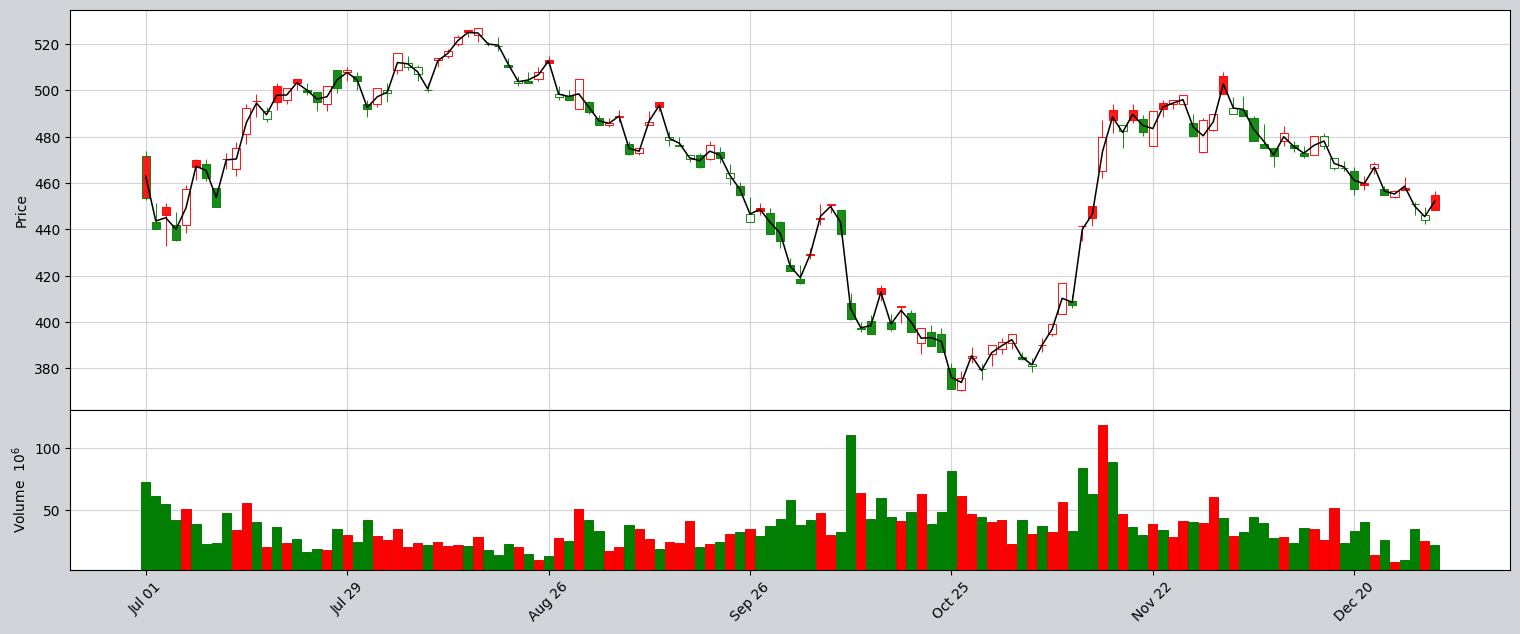

In [18]:
avg=AVGPRICE(data)

fin_chart = chart(data)
fin_chart.TA(avg,panel=0,type="line",color="black")
fin_chart.Show()

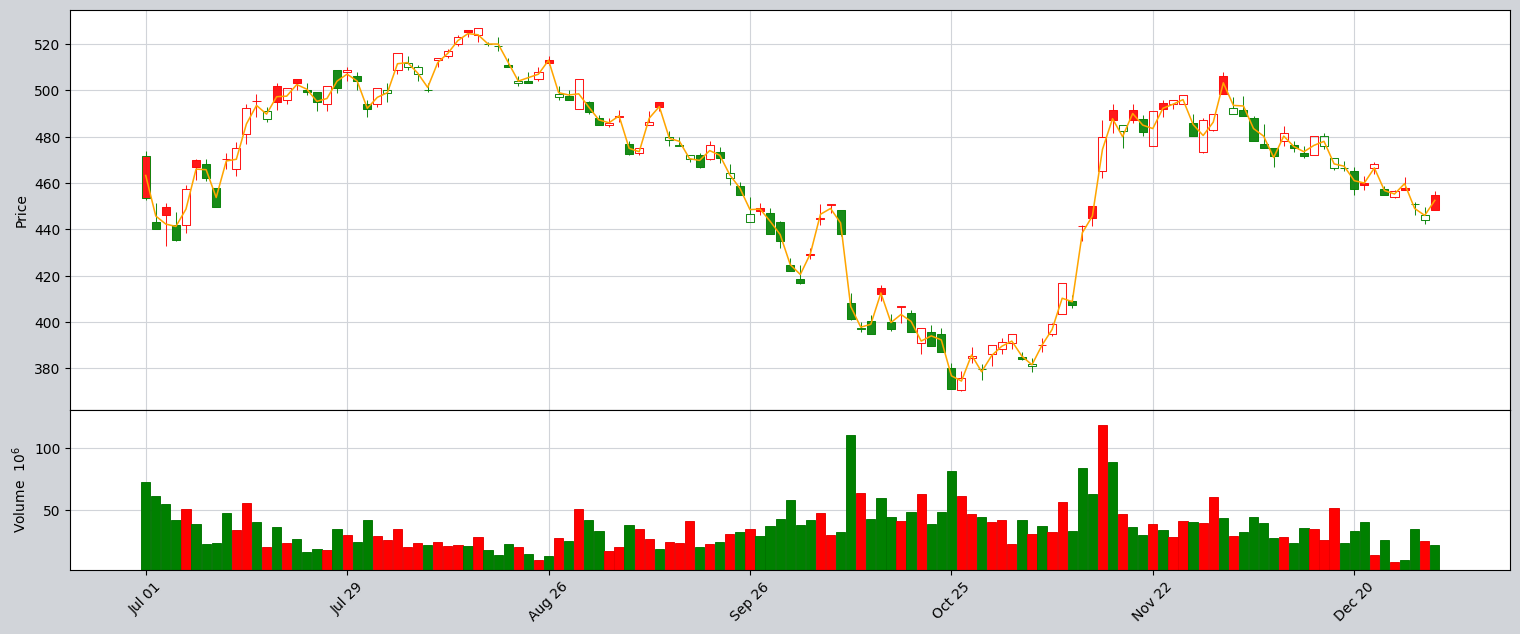

In [17]:
med=MEDPRICE(data)

fin_chart = chart(data)
fin_chart.TA(med,panel=0,type="line",color="orange")
fin_chart.Show()

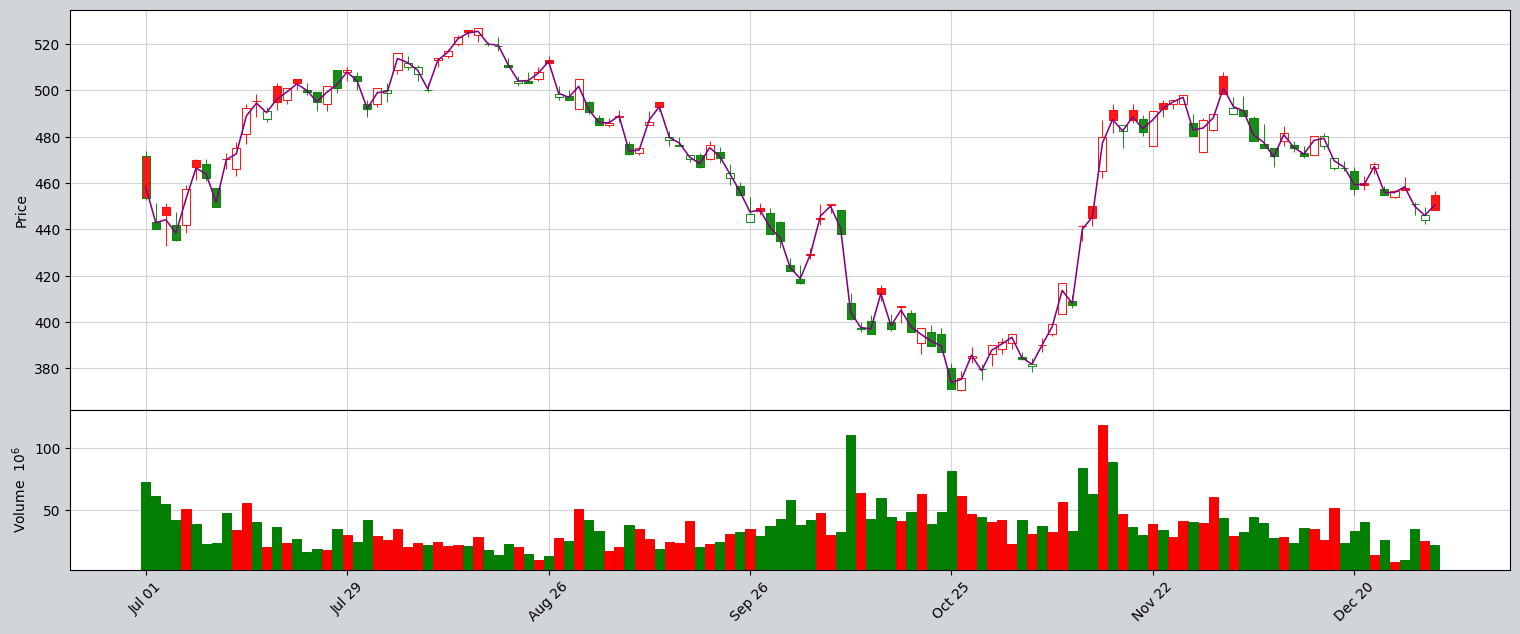

In [14]:
wcl=WCLPRICE(data)

fin_chart = chart(data)
fin_chart.TA(wcl,panel=0,type="line",color="purple")
fin_chart.Show()

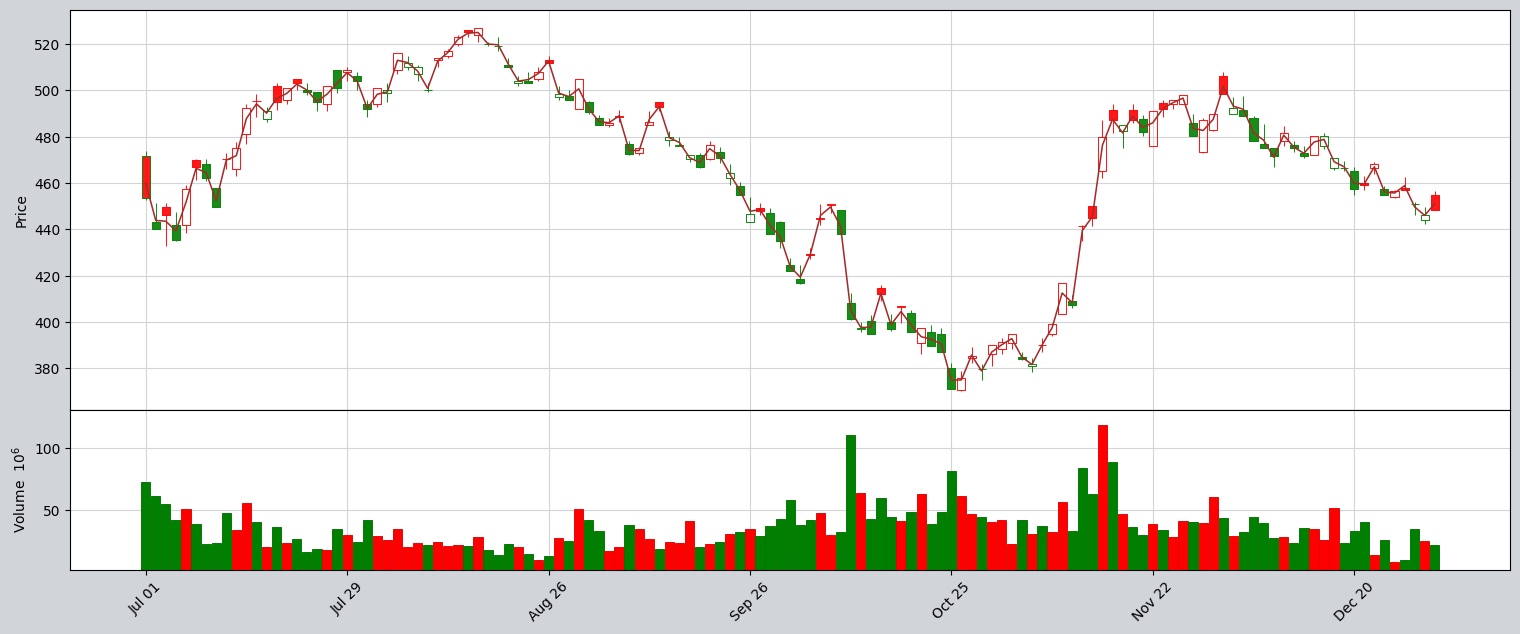

In [12]:
typ=TYPPRICE(data)

fin_chart = chart(data)
fin_chart.TA(typ,panel=0,type="line",color="Brown")
fin_chart.Show()